## Linear Regression Tutorial

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let us first generate data which follows y = 5x + 6 + epsilon.

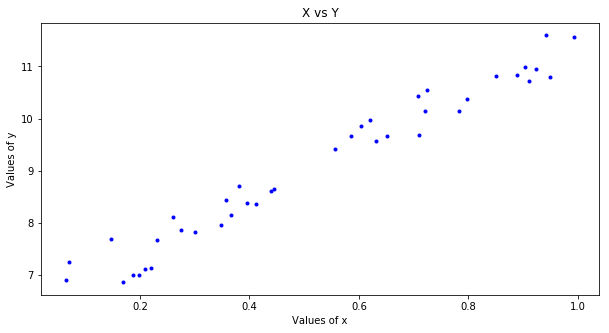

In [2]:
# Generate data
x = np.random.rand(40)
epsilon = np.random.rand(40)
y = 5 * x + 6 + epsilon

# Plot data
plt.figure(figsize = (10, 5))
plt.plot(x,y, 'b.')
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.title("X vs Y")
plt.show()


Define loss function

In [3]:
# Loss function
def loss(y, y_predicted):
    return np.mean(np.square(y-y_predicted))

Define Gradient Descent

In [4]:
def get_grad(x_data, y_data, m, c):
    m_grad = np.mean((y_data - (m*x_data+c))*(-x_data))
    c_grad = np.mean((y_data - (m*x_data+c))*(-1))
    return m_grad, c_grad


Final m and c values are m_final = 5.29, c_final - 6.27


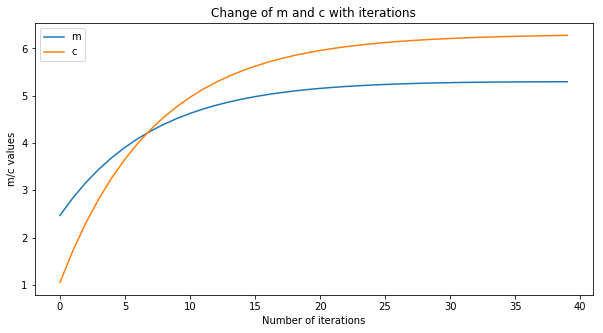

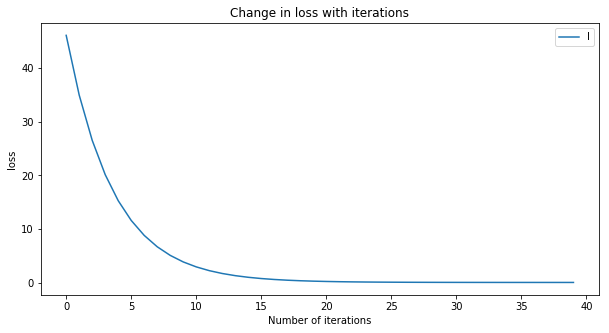

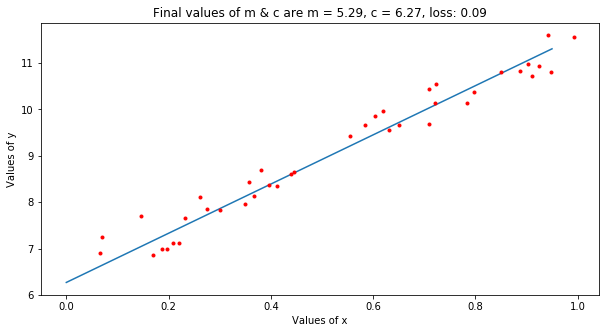

In [5]:
# Set random.seed value
np.random.seed(40)

# Initialize m and c values
m0 = float(np.random.rand(1)*5)
c0 = float(np.random.rand(1)*5)

# Create empty lists to store intermediate m, c, loss functions
m_vec = []; c_vec = []; loss_vec = []

# NumberOfIterations
NumberOfIterations = 40

# Learning rate
lr = 0.1
for i in range(0, 40):
    m_grad, c_grad = get_grad(x, y, m0, c0)
    m0 = m0 - lr * m_grad
    c0 = c0 - lr * c_grad
    loss0 = loss(y, (m0*x+c0))
    
    m_vec.append(m0)
    c_vec.append(c0)
    loss_vec.append(loss0)
    
print("Final m and c values are m_final = {:2.2f}, c_final - {:2.2f}".format(m0,c0))
    
# Visualizing change in m and c with number of iterations
plt.figure(figsize=(10,5))
plt.plot(m_vec, label='m')
plt.plot(c_vec, label='c')
plt.title('Change of m and c with iterations')
plt.xlabel("Number of iterations")
plt.ylabel("m/c values")
plt.legend(); plt.show()

# Visualizing loss with number of iterations
plt.figure(figsize=(10,5))
plt.plot(loss_vec, label='l')
plt.title('Change in loss with iterations')
plt.xlabel("Number of iterations")
plt.ylabel("loss")
plt.legend(); plt.show()

# Visualizaing final line on data
m = m0; c = c0
x_range = np.arange(0,1,0.05)
y_range = m * x_range + c
y_pred = m * x + c
plt.figure(figsize=(10,5))
plt.plot(x_range, y_range)
plt.plot(x, y, 'r.')
plt.title('Final values of m & c are m = {:2.2f}, c = {:2.2f}, loss: {:2.2f}'.format(m, c, loss(y,y_pred)))
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()


It's a long process!!! isn't it?

Let's use sklearn to build the same regression line 

In [6]:
# Import necessary packages
import sklearn
from sklearn.linear_model import LinearRegression

Get Linear Regression model object

In [7]:
lm = LinearRegression()

In [8]:
# Fit linear regression on x and y
lm.fit(x, y)

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 40]

It seems dimensions are not correct. Let's check them.

In [9]:
# Let us check the shape of x
x.shape

(40,)

In [10]:
# Let us check the shape of y
y.shape

(40,)

we need to give shape of (M, N) and not (M, ). So let's reshape them.

You need to give column vector for x and y

In [11]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [12]:
# Shape of x
x.shape

(40, 1)

In [13]:
# Shape of y
y.shape

(40, 1)

Fit linear regression model on data

In [14]:
lm.fit(x, y)

/usr/local/Cellar/python3/3.5.2_3/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Get slope and intercept

In [15]:
# lm.intercept_
c_pred = lm.intercept_
c_pred

array([ 6.42852436])

In [17]:
# lm.coef_
m_pred = lm.coef_
m_pred

array([[ 5.07326573]])

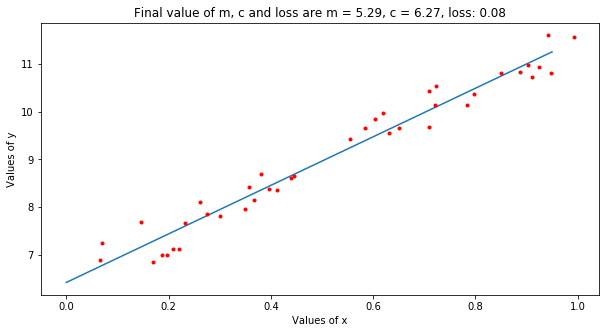

In [18]:
# Visualizaing final line on data

x_range = np.arange(0,1,0.05)
y_range = lm.predict(x_range.reshape(-1,1))
y_pred = m_pred * x + c_pred
plt.figure(figsize=(10,5))
plt.plot(x_range, y_range)
plt.plot(x, y, 'r.')
plt.title('Final value of m, c and loss are m = {:2.2f}, c = {:2.2f}, loss: {:2.2f}'.format(m, c, loss(y,y_pred)))
plt.xlabel("Values of x")
plt.ylabel("Values of y")
plt.show()


Using sklearn you need not define loss function and gradient descent. Sklearn takes care of everything.

### Excercises 

    1) Build linear regression on data.csv using sklearn. ( Remember pd.read_csv to load csv file?)
    2) Try other different vectorized operations and check how it is reducing time.